In [91]:
import pandas as pd
import seaborn as sns
import random
import string
import warnings
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook
import re
from scipy import stats

from collections import Counter 

In [68]:
tweets = pd.read_excel("/Users/arjunanandapadmanabhan/Downloads/Tweets.xlsx")

In [69]:
predictions = pd.read_csv("/Users/arjunanandapadmanabhan/Downloads/predictions.csv")

In [70]:
final = tweets.merge(predictions, on=['Date', 'Content'], how='left')

In [71]:
len(final)

2387

In [72]:
final = final[final['Labels'].notna()]

In [73]:
final = final[final['Labels'] != 'Irrelevant']

In [74]:
conditions = [
    (final['Labels'] == 'Positive'),
    (final['Labels'] == 'Negative'),
    (final['Labels'] == 'Neutral'),]
     
values = [1, 0, -1]


final['sentiment_score'] = np.select(conditions, values)

Text(0, 0.5, 'Mean Sentiment Score')

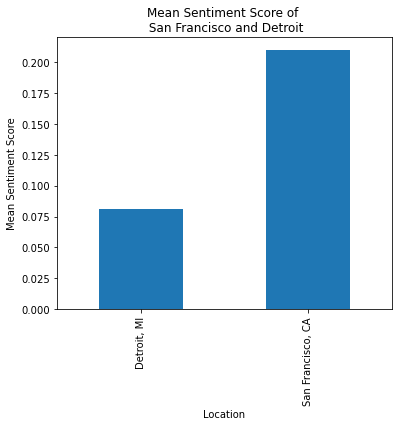

In [75]:
dfg = final.groupby(['Location_x'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='Location_x', figsize=(6, 5)).set(title='Mean Sentiment Score of \n San Francisco and Detroit')
plt.xlabel('Location')
plt.ylabel('Mean Sentiment Score')

Text(0, 0.5, 'Sentiment Score')

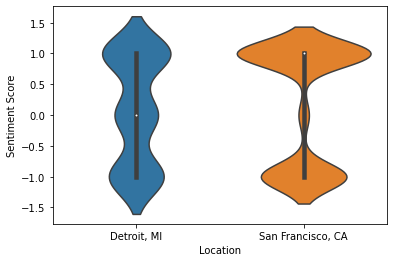

In [81]:
order = ['Detroit, MI', 'San Francisco, CA']
ax = sns.violinplot(x="Location_x", y="sentiment_score", data=final, order=order)
plt.xlabel('Location')
plt.ylabel('Sentiment Score')

In [83]:
np.mean(final[final.Location_x =='San Francisco, CA']['sentiment_score'])

0.2095771144278607

In [94]:
np.mean(final[final.Location_x =='Detroit, MI']['sentiment_score'])

0.08108108108108109

In [85]:
np.std(final[final.Location_x =='San Francisco, CA']['sentiment_score'])

0.9542952494683313

In [86]:
np.std(final[final.Location_x =='Detroit, MI']['sentiment_score'])

0.8567183894555233

In [99]:
stats.ttest_ind(final[final.Location_x =='San Francisco, CA']['sentiment_score'],
               final[final.Location_x =='Detroit, MI']['sentiment_score'],
               equal_var=False)

Ttest_indResult(statistic=1.9037717214449776, pvalue=0.058138887380460136)